In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
df_poluicao_beijing = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')

In [4]:
df_poluicao_beijing.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [5]:
df_poluicao_beijing.shape

(43824, 13)

In [7]:
df_poluicao_beijing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [8]:
df_poluicao_beijing.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [12]:
# Obtendo os dados em formato de datetime
df_poluicao_beijing['datetime'] = df_poluicao_beijing[['year','month','day','hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'], hour=row['hour']), axis = 1)

In [13]:
df_poluicao_beijing.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


In [14]:
# Datas máximas e minimas do dataset
print('Data inicial: ', df_poluicao_beijing['datetime'].min())
print('Data final: ', df_poluicao_beijing['datetime'].max())

Data inicial:  2010-01-01 00:00:00
Data final:  2014-12-31 23:00:00


In [19]:
df_pressao_atmosferica = df_poluicao_beijing[['datetime', 'PRES']].copy()
df_pressao_atmosferica.head()

,datetime,PRES
0,2010-01-01 00:00:00,1021.0
1,2010-01-01 01:00:00,1020.0
2,2010-01-01 02:00:00,1019.0
3,2010-01-01 03:00:00,1019.0
4,2010-01-01 04:00:00,1018.0


In [22]:
# Garantindo que dados vão estar ordenados
df_pressao_atmosferica.sort_values('datetime',ascending=True, inplace=True)

In [23]:
df_pressao_atmosferica.head()

,datetime,PRES
0,2010-01-01 00:00:00,1021.0
1,2010-01-01 01:00:00,1020.0
2,2010-01-01 02:00:00,1019.0
3,2010-01-01 03:00:00,1019.0
4,2010-01-01 04:00:00,1018.0


Text(0.5, 1.0, 'Box Plot para Pressão Atmosférica')

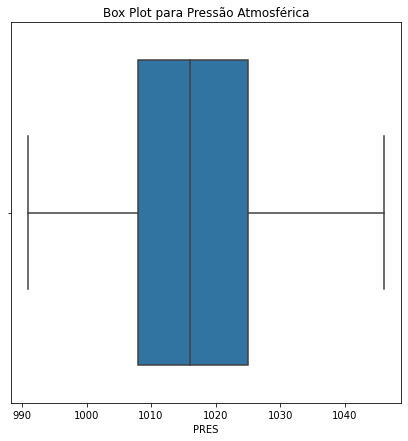

In [24]:
# Verificando outliers
plt.figure(figsize=(7,7))
g = sns.boxplot(df_pressao_atmosferica['PRES'])
g.set_title('Box Plot para Pressão Atmosférica')

Text(0, 0.5, 'Pressão atmosférica em hPa')

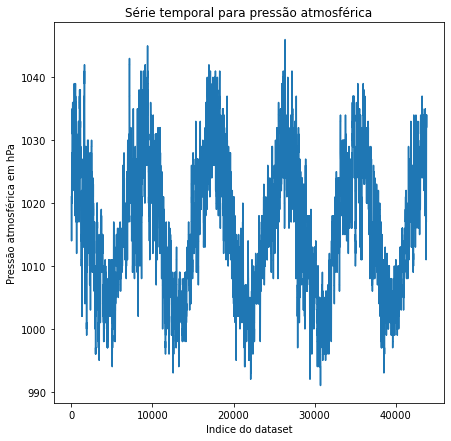

In [25]:
# Plotando dados para pressão atmosférica
plt.figure(figsize=(7,7))
g = sns.lineplot(x=df_pressao_atmosferica.index, y = df_pressao_atmosferica['PRES'])
g.set_title('Série temporal para pressão atmosférica')
g.set_xlabel('Indice do dataset')
g.set_ylabel('Pressão atmosférica em hPa')

In [31]:
# Preparando dados para serem utilizados no modelo de previsão via MLP

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_pressao_atmosferica['PRES_normalizado'] = scaler.fit_transform(np.array(df_pressao_atmosferica['PRES']).reshape(-1,1))

In [32]:
df_pressao_atmosferica.head()

,datetime,PRES,PRES_normalizado
0,2010-01-01 00:00:00,1021.0,0.545455
1,2010-01-01 01:00:00,1020.0,0.527273
2,2010-01-01 02:00:00,1019.0,0.509091
3,2010-01-01 03:00:00,1019.0,0.509091
4,2010-01-01 04:00:00,1018.0,0.490909


In [34]:
# Dividindo em dados de treino e teste
data_de_corte = datetime.datetime(year=2014, month=1, day=1, hour=0) 
# definindo data de corte: 01/01/2014
df_treinamento = df_pressao_atmosferica.loc[df_pressao_atmosferica['datetime']<data_de_corte]
df_teste  = df_pressao_atmosferica.loc[df_pressao_atmosferica['datetime']>= data_de_corte]
print('Quantidade de dados para treinamento: ', df_treinamento.shape)
print('Quantidade de dados para teste: ', df_teste.shape)


Quantidade de dados para treinamento:  (35064, 3)
Quantidade de dados para teste:  (8760, 3)


Text(0, 0.5, 'Leituras normalizadas')

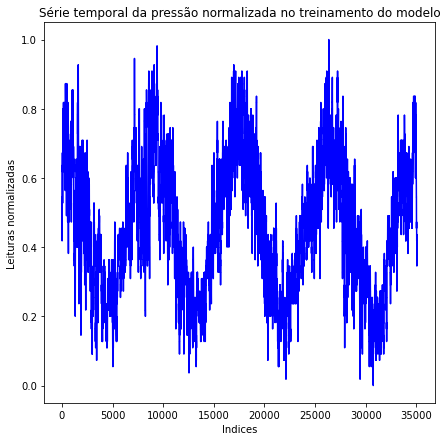

In [35]:
# Verificando a cara dos dados de treino
plt.figure(figsize=(7,7))
g = sns.lineplot(x=df_treinamento.index, y=df_treinamento['PRES_normalizado'], color='b')
g.set_title('Série temporal da pressão normalizada no treinamento do modelo')
g.set_xlabel('Indices')
g.set_ylabel('Leituras normalizadas')

Text(0, 0.5, 'Leituras normalizadas')

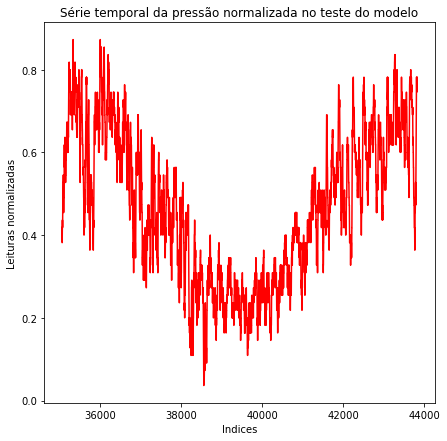

In [36]:
# Verificando a cara dos dados de teste
plt.figure(figsize=(7,7))
g = sns.lineplot(x=df_teste.index, y=df_teste['PRES_normalizado'], color='r')
g.set_title('Série temporal da pressão normalizada no teste do modelo')
g.set_xlabel('Indices')
g.set_ylabel('Leituras normalizadas')

In [41]:
# Definindo o número de valores a serem utilizados para previsão
def formata_entrada_saida(serie_temporal_original, numero_de_passos):
    X = []
    y = []
    for i in range(numero_de_passos, serie_temporal_original.shape[0]):
        X.append(list(serie_temporal_original.loc[i-numero_de_passos:i-1]))
        y.append(serie_temporal_original.loc[i])
        # faz i de 10 até num de linhas do dataframe
        # Começando do 10 valor = pega os 9 anteriores como X 
        # Repete isso para todos.
    X,y = np.array(X), np.array(y)
    return X,y
    

In [44]:
# formata dados para o treinamento do modelo
X_train, y_train = formata_entrada_saida(df_treinamento['PRES_normalizado'], 10)
print('Formato dos dados:', X_train.shape, y_train.shape)

# O passos 10 não foi feito usando autocorrelação, foi arbitrario

Formato dos dados: (35054, 10) (35054,)


In [45]:
X_train[1:15, :]

array([[0.52727273, 0.50909091, 0.50909091, 0.49090909, 0.47272727,
        0.47272727, 0.47272727, 0.47272727, 0.47272727, 0.47272727],
       [0.50909091, 0.50909091, 0.49090909, 0.47272727, 0.47272727,
        0.47272727, 0.47272727, 0.47272727, 0.47272727, 0.47272727],
       [0.50909091, 0.49090909, 0.47272727, 0.47272727, 0.47272727,
        0.47272727, 0.47272727, 0.47272727, 0.47272727, 0.43636364],
       [0.49090909, 0.47272727, 0.47272727, 0.47272727, 0.47272727,
        0.47272727, 0.47272727, 0.47272727, 0.43636364, 0.43636364],
       [0.47272727, 0.47272727, 0.47272727, 0.47272727, 0.47272727,
        0.47272727, 0.47272727, 0.43636364, 0.43636364, 0.41818182],
       [0.47272727, 0.47272727, 0.47272727, 0.47272727, 0.47272727,
        0.47272727, 0.43636364, 0.43636364, 0.41818182, 0.41818182],
       [0.47272727, 0.47272727, 0.47272727, 0.47272727, 0.47272727,
        0.43636364, 0.43636364, 0.41818182, 0.41818182, 0.43636364],
       [0.47272727, 0.47272727, 0.4727272

In [46]:
X_teste, y_teste = formata_entrada_saida(df_teste['PRES_normalizado'].reset_index(drop=True), 10)
print('Formato dos dados normalizacao:', X_teste.shape, y_teste.shape)

Formato dos dados normalizacao: (8750, 10) (8750,)


In [47]:
X_teste[1:15, :]

array([[0.4       , 0.4       , 0.4       , 0.38181818, 0.38181818,
        0.38181818, 0.4       , 0.4       , 0.41818182, 0.43636364],
       [0.4       , 0.4       , 0.38181818, 0.38181818, 0.38181818,
        0.4       , 0.4       , 0.41818182, 0.43636364, 0.43636364],
       [0.4       , 0.38181818, 0.38181818, 0.38181818, 0.4       ,
        0.4       , 0.41818182, 0.43636364, 0.43636364, 0.43636364],
       [0.38181818, 0.38181818, 0.38181818, 0.4       , 0.4       ,
        0.41818182, 0.43636364, 0.43636364, 0.43636364, 0.41818182],
       [0.38181818, 0.38181818, 0.4       , 0.4       , 0.41818182,
        0.43636364, 0.43636364, 0.43636364, 0.41818182, 0.41818182],
       [0.38181818, 0.4       , 0.4       , 0.41818182, 0.43636364,
        0.43636364, 0.43636364, 0.41818182, 0.41818182, 0.41818182],
       [0.4       , 0.4       , 0.41818182, 0.43636364, 0.43636364,
        0.43636364, 0.41818182, 0.41818182, 0.41818182, 0.41818182],
       [0.4       , 0.41818182, 0.4363636

In [48]:
# Construindo rede
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import SGD

In [50]:
# Camada de entrada
camada_entrada = Input(shape=(10,), dtype='float32')

# Camada escondidas
densa1 = Dense(32, activation='linear')(camada_entrada)
densa2 = Dense(16, activation='linear')(densa1)
densa3 = Dense(16, activation='linear')(densa2)

# Adiciona dropout
camada_dropout = Dropout(0.2)(densa3)

# Camada de saída
camada_de_saida = Dense(1, activation='linear')(camada_dropout)

# Definindo modelo MLP (Multi-Layer Perceptron)
modelo_MLP = tf.keras.Model(inputs=camada_entrada, outputs=camada_de_saida)

In [52]:
# Observando a arquitetura do modelo:

modelo_MLP.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
___________________________________________________________

In [53]:
# Definindo a função de erro e otimizador

modelo_MLP.compile(loss='mean_squared_error', optimizer='adam')

In [54]:
# Treinamento do modelo e aprendizado dos coeficientes
modelo_MLP.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1, shuffle=True)

Epoch 1/20
2191/2191 [==============================] - 2s 964us/step - loss: 0.0035
Epoch 2/20
2191/2191 [==============================] - 2s 1ms/step - loss: 0.0011A: 0
Epoch 3/20
2191/2191 [==============================] - 2s 995us/step - loss: 8.8594e-04 0s - loss: 
Epoch 4/20
2191/2191 [==============================] - 2s 1000us/step - loss: 8.2135e-04
Epoch 5/20
2191/2191 [==============================] - 2s 1ms/step - loss: 8.1196e-04
Epoch 6/20
2191/2191 [==============================] - 2s 1ms/step - loss: 7.7499e-04
Epoch 7/20
2191/2191 [==============================] - 2s 1ms/step - loss: 7.7841e-04
Epoch 8/20
2191/2191 [==============================] - 2s 1ms/step - loss: 7.9026e-04
Epoch 9/20
2191/2191 [==============================] - 2s 1ms/step - loss: 7.7399e-04
Epoch 10/20
2191/2191 [==============================] - 2s 1ms/step - loss: 7.8378e-04
Epoch 11/20
2191/2191 [==============================] - 2s 1ms/step - loss: 7.7311e-04
Epoch 12/20
2191/2191 [===

In [55]:
# Realizou a previsão com o modelo MLP
previsao = modelo_MLP.predict(X_teste)
previsao_PRES = scaler.inverse_transform(previsao)
previsao_PRES.shape

(8750, 1)

In [57]:
# Removendo uma dimensão
previsao_PRES = np.squeeze(previsao_PRES)
previsao_PRES.shape

(8750,)

In [59]:
from sklearn.metrics import r2_score
r2 = r2_score(df_teste['PRES'].iloc[10:], previsao_PRES)
# Ignorando os 10 primeiros valores pois são utilizados para previsão do 
# valor a partir do décimo.
print('Coeficiente de determinação para o teste(MLP): ', round(r2, 4))

Coeficiente de determinação para o teste(MLP):  0.9957


Text(0.5, 0, 'Indice')

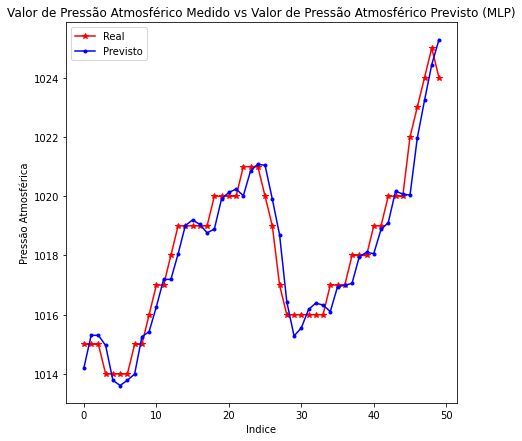

In [63]:
# Plotando os valores reais x previstos (de 50 dados apenas)
plt.figure(figsize=(7,7))
plt.plot(range(50), df_teste['PRES'].iloc[10:60], linestyle='-', marker='*', color='r')
plt.plot(range(50), previsao_PRES[:50], linestyle='-', marker='.', color='b')
plt.legend(['Real', 'Previsto'], loc=2)
plt.title('Valor de Pressão Atmosférico Medido vs Valor de Pressão Atmosférico Previsto (MLP)')
plt.ylabel('Pressão Atmosférica')
plt.xlabel('Indice')

In [64]:
# Testando rede CNN 

from tensorflow.keras.layers import Flatten # transforma 1D
from tensorflow.keras.layers import ZeroPadding1D # completa dados após conv.
from tensorflow.keras.layers import Conv1D # camada de convolução
from tensorflow.keras.layers import AveragePooling1D # camada de redução (média dos dados encontrados)

In [69]:
# Camada de entrada
camada_entrada = Input(shape=(10,1), dtype='float32')

# === Camada de Convolução ===

# Camada de Padding
camada_padding = ZeroPadding1D(padding=1)(camada_entrada)
# Preenche com 0's antes da convolução para não perder dados
# Lembrar que convolução DIMINUI o tamanho dos dados

# Camada de convolução
camada_convolucao1D = Conv1D(64, 3, strides=1, use_bias=True)(camada_padding)
# Adiciona 64 filtros com uma janela de convolução = 3

# Camada de Pooling
camada_pooling = AveragePooling1D(pool_size=3, strides=1)(camada_convolucao1D)
# Reduz valor através do valor média para a convolução
# Se fosse MaxPooling seria valor máximo

# === Camada Densa ===

# Camada Flatten
camada_flatten = Flatten()(camada_pooling)

# Camada Dropout
camada_dropout_cnn = Dropout(0.2)(camada_flatten)

# Camada de Saída
camada_saida = Dense(1, activation='linear')(camada_dropout_cnn)

# Definindo modelo MLP (Multi-Layer Perceptron)
modelo_CNN = tf.keras.Model(inputs=camada_entrada, outputs=camada_saida)

In [71]:
# Observando arquitetura criada e total parametros

modelo_CNN.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
zero_padding1d_4 (ZeroPaddin (None, 12, 1)             0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 10, 64)            256       
_________________________________________________________________
average_pooling1d_4 (Average (None, 8, 64)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513 

In [72]:
# Compilando e colocando função perda e otimizados
modelo_CNN.compile(loss='mean_absolute_error', optimizer='adam')

In [73]:
# Transformando os dados de treinamento e teste para 3D (CNN exige)
X_train, X_teste = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), X_teste.reshape((X_teste.shape[0], X_teste.shape[1], 1))
print('Formatos para o treinamento e teste: ', X_train.shape, X_teste.shape)

Formatos para o treinamento e teste:  (35054, 10, 1) (8750, 10, 1)


In [74]:
# Realizando treino do modelo
modelo_CNN.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1, shuffle=True)

Epoch 1/20
2191/2191 [==============================] - 3s 2ms/step - loss: 0.0278
Epoch 2/20
2191/2191 [==============================] - 3s 2ms/step - loss: 0.0176
Epoch 3/20
2191/2191 [==============================] - 3s 2ms/step - loss: 0.0154
Epoch 4/20
2191/2191 [==============================] - 3s 2ms/step - loss: 0.0146
Epoch 5/20
2191/2191 [==============================] - 3s 2ms/step - loss: 0.0140
Epoch 6/20
2191/2191 [==============================] - 3s 2ms/step - loss: 0.0140
Epoch 7/20
2191/2191 [==============================] - 4s 2ms/step - loss: 0.0139
Epoch 8/20
2191/2191 [==============================] - 3s 2ms/step - loss: 0.0136
Epoch 9/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0133
Epoch 10/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0134
Epoch 11/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0136
Epoch 12/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0138
E

In [76]:
# Previsão com modelo CNN
previsao_cnn = modelo_CNN.predict(X_teste)
PRES_cnn = np.squeeze(scaler.inverse_transform(previsao_cnn))

In [77]:
r2_cnn = r2_score(df_teste['PRES'].iloc[10:], PRES_cnn)
print('Coeficiente de determinação para o teste: ', round(r2, 4))

Coeficiente de determinação para o teste:  0.9957


Text(0.5, 0, 'Indice')

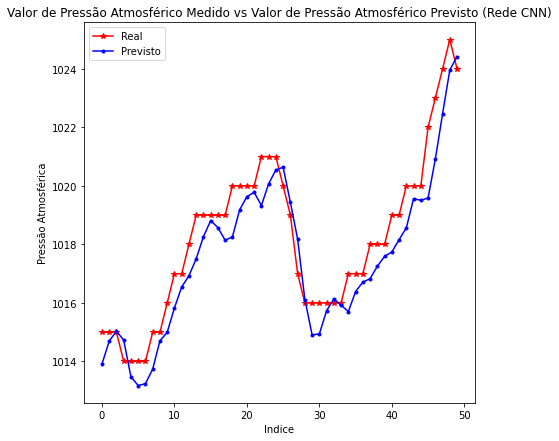

In [78]:
# Plotando os valores reais x previstos (de 50 dados apenas)
plt.figure(figsize=(7,7))
plt.plot(range(50), df_teste['PRES'].iloc[10:60], linestyle='-', marker='*', color='r')
plt.plot(range(50), PRES_cnn[:50], linestyle='-', marker='.', color='b')
plt.legend(['Real', 'Previsto'], loc=2)
plt.title('Valor de Pressão Atmosférico Medido vs Valor de Pressão Atmosférico Previsto (Rede CNN)')
plt.ylabel('Pressão Atmosférica')
plt.xlabel('Indice')